In [1]:
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
from redcap.project import Project
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tableone import TableOne
from IPython.display import Markdown
from datetime import datetime
import numpy as np
from IPython.display import display
from PIL import Image
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon



import warnings
warnings.simplefilter("ignore")

sns.set_theme(style='white')

import sys
sys.path.append("/Users/golpira/Python/University of Calgary/RedCap-API-Git/RedCap_StudyLoader")
from redcap_classes import RedcapProcessor, Record, BloodDraw
from my_functions import my_tableone, analyze_hgb, plot_variables_over_time

In [2]:
### Teg-Hip
load_dotenv()
api_url = os.getenv("REDCAP_URL")
api_key_hip = os.getenv("REDCAP_TEG_HIP_API_KEY")

processor_1 = RedcapProcessor(api_url, api_key_hip)

df_hip= processor_1.fetch_and_process()
df_hip_demo=processor_1.get_all_demographics()


all_blood_hip = processor_1.get_all_blood_draws()
all_blood_hip[all_blood_hip['injury_to_lab_hrs']<0][['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']]
# # print('=========================')
# print(processor_1.get_patient_demographics('TH-023'))


Removing the following StudyIDs from dataset:
 - TH-226: Treated non-operatively
310


,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs


In [3]:
all_blood_hip[['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']]

,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
0,TH-001,Admission,2017-12-19 11:00:00,2017-12-19 20:34:00,2017-12-19 20:34:00,9.566667,9.566667,-18.666667,-18.666667
1,TH-001,Week2,2017-12-19 11:00:00,2018-01-02 11:17:00,2018-01-02 11:17:00,336.283333,336.283333,308.050000,308.050000
2,TH-001,Week6,2017-12-19 11:00:00,2018-01-30 14:10:00,2018-01-30 14:10:00,1011.166667,1011.166667,982.933333,982.933333
3,TH-001,Month3,2017-12-19 11:00:00,2018-03-22 13:45:00,2018-03-22 13:45:00,2234.750000,2234.750000,2206.516667,2206.516667
4,TH-001,PFD1,2017-12-19 11:00:00,2017-12-20 11:15:00,2017-12-20 11:15:00,24.250000,24.250000,-3.983333,-3.983333
5,TH-001,POD1,2017-12-19 11:00:00,2017-12-21 11:30:00,2017-12-21 11:30:00,48.500000,48.500000,20.266667,20.266667
6,TH-001,POD2,2017-12-19 11:00:00,2017-12-22 11:50:00,2017-12-22 11:50:00,72.833333,72.833333,44.600000,44.600000
7,TH-001,POD3,2017-12-19 11:00:00,2017-12-23 10:59:00,2017-12-23 10:59:00,95.983333,95.983333,67.750000,67.750000
8,TH-001,POD4,2017-12-19 11:00:00,2017-12-24 11:25:00,2017-12-24 11:25:00,120.416667,120.416667,92.183333,92.183333
9,TH-001,POD5,2017-12-19 11:00:00,2017-12-25 11:15:00,2017-12-25 11:15:00,144.250000,144.250000,116.016667,116.016667


In [4]:
# ### Hip Pathway
load_dotenv()
api_url = os.getenv("REDCAP_URL")
api_key_pathway = os.getenv("REDCAP_HIP_PATHWAY_API_KEY")

processor_2 = RedcapProcessor(api_url, api_key_pathway)

df_pathway= processor_2.fetch_and_process()
df_pathway_demo=processor_2.get_all_demographics()

all_blood_pathway = processor_2.get_all_blood_draws()
display(all_blood_pathway[all_blood_pathway['injury_to_lab_hrs']<0][['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']])

# # print('=========================')
# print(processor_2.get_patient_demographics('HPA-028'))

31


,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs


In [5]:
all_blood_pathway[['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']]

,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
0,HPA-001,Week2,2024-02-10 18:15:00,NaT,2024-02-23 07:00:00,<NA>,300.750000,<NA>,256.900000
1,HPA-001,Admission,2024-02-10 18:15:00,NaT,2024-02-11 08:57:00,<NA>,14.700000,<NA>,-29.150000
2,HPA-001,4 hr Pre-OP,2024-02-10 18:15:00,NaT,2024-02-12 12:00:00,<NA>,41.750000,<NA>,-2.100000
3,HPA-001,PFD1,2024-02-10 18:15:00,2024-02-12 02:38:00,2024-02-12 00:00:00,32.383333,29.750000,-11.466667,-14.100000
4,HPA-001,POD1,2024-02-10 18:15:00,NaT,2024-02-13 07:00:00,<NA>,60.750000,<NA>,16.900000
5,HPA-001,POD3,2024-02-10 18:15:00,NaT,2024-02-15 09:02:00,<NA>,110.783333,<NA>,66.933333
6,HPA-001,POD5,2024-02-10 18:15:00,NaT,2024-02-17 08:00:00,<NA>,157.750000,<NA>,113.900000
7,HPA-001,POD7,2024-02-10 18:15:00,NaT,2024-02-20 07:00:00,<NA>,228.750000,<NA>,184.900000


In [6]:
load_dotenv()

### Teg-Femur
api_url = os.getenv("REDCAP_URL")
api_key_femur = os.getenv("REDCAP_TEG_FEMUR_API_KEY")

processor_3 = RedcapProcessor(api_url, api_key_femur)

df_femur= processor_3.fetch_and_process()
df_femur_demo=processor_3.get_all_demographics()

all_blood_femur = processor_3.get_all_blood_draws()
all_blood_femur[all_blood_femur['injury_to_lab_hrs']<0][['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']]

# # print('=========================')
# print(processor_3.get_patient_demographics('TF-006'))

Removing the following StudyIDs from dataset:
 - TF-070: Multiple Surgery Patient_TIMEPOINT_ISSUE
 - TF-084: Multiple Surgery Patient_TIMEPOINT_ISSUE
129


,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs


In [7]:
all_blood_femur[['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']]

,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
0,TF-002,Admission,2018-01-30 11:00:00,2018-01-30 20:17:00,2018-01-30 20:17:00,9.283333,9.283333,-12.016667,-12.016667
1,TF-002,Pre-Op,2018-01-30 11:00:00,2018-01-31 07:30:00,2018-01-31 07:30:00,20.500000,20.500000,-0.800000,-0.800000
2,TF-002,POD2,2018-01-30 11:00:00,2018-02-02 09:00:00,2018-02-02 09:00:00,70.000000,70.000000,48.700000,48.700000
3,TF-002,Week2,2018-01-30 11:00:00,2018-02-15 09:27:00,2018-02-15 09:27:00,382.450000,382.450000,361.150000,361.150000
4,TF-002,POST_OP,2018-01-30 11:00:00,2018-01-31 10:40:00,2018-01-31 10:40:00,23.666667,23.666667,2.366667,2.366667
5,TF-002,POD1,2018-01-30 11:00:00,2018-02-01 09:40:00,2018-02-01 09:40:00,46.666667,46.666667,25.366667,25.366667


In [8]:
load_dotenv()

### Teg-Pelvis
api_url = os.getenv("REDCAP_URL")
api_key_pelvis = os.getenv("REDCAP_TEG_PELVIS_API_KEY")

processor_4 = RedcapProcessor(api_url, api_key_pelvis)

df_pelvis= processor_4.fetch_and_process()
df_pelvis_demo=processor_4.get_all_demographics()

all_blood_pelvis = processor_4.get_all_blood_draws()
all_blood_pelvis[all_blood_pelvis['injury_to_lab_hrs']<0][['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']]

# # print('=========================')
# print(processor_4.get_patient_demographics('TPA-049'))

Removing the following StudyIDs from dataset:
 - TPA-019: Multiple Surgery Patient
 - TPA-028: Multiple Surgery Patient
 - TPA-043: Multiple Surgery Patient
 - TPA-048: Multiple Surgery Patient
 - TPA-056: Multiple Surgery Patient
 - TPA-079: Multiple Surgery Patient
 - TPANO-001: Excluded - Non-Operative Arm
 - TPANO-002: Excluded - Non-Operative Arm
 - TPANO-003: Excluded - Non-Operative Arm
 - TPANO-004: Excluded - Non-Operative Arm
 - TPANO-005: Excluded - Non-Operative Arm
 - TPANO-006: Excluded - Non-Operative Arm
 - TPANO-007: Excluded - Non-Operative Arm
 - TPANO-008: Excluded - Non-Operative Arm
 - TPANO-009: Excluded - Non-Operative Arm
 - TPANO-010: Excluded - Non-Operative Arm
 - TPANO-011: Excluded - Non-Operative Arm
 - TPANO-012: Excluded - Non-Operative Arm
96


,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs


In [9]:
all_blood_pelvis[['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']]

,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
0,TPA-001,Admission,2020-02-03 15:00:00,2020-02-04 11:35:00,2020-02-04 11:35:00,20.583333,20.583333,-2.833333,-2.833333
1,TPA-001,Week2,2020-02-03 15:00:00,2020-02-14 11:01:00,2020-02-14 11:01:00,260.016667,260.016667,236.600000,236.600000
2,TPA-001,Week4,2020-02-03 15:00:00,2020-03-02 11:47:00,2020-03-02 11:47:00,668.783333,668.783333,645.366667,645.366667
3,TPA-001,Week6,2020-02-03 15:00:00,2020-03-16 10:51:00,2020-03-16 10:51:00,1003.850000,1003.850000,980.433333,980.433333
4,TPA-001,Month3,2020-02-03 15:00:00,2020-05-20 13:07:00,2020-05-20 13:07:00,2566.116667,2566.116667,2542.700000,2542.700000
5,TPA-001,POD1,2020-02-03 15:00:00,2020-02-05 14:40:00,2020-02-05 14:40:00,47.666667,47.666667,24.250000,24.250000
6,TPA-001,POD3,2020-02-03 15:00:00,2020-02-07 12:29:00,2020-02-07 12:29:00,93.483333,93.483333,70.066667,70.066667
7,TPA-001,POD5,2020-02-03 15:00:00,2020-02-09 14:37:00,2020-02-09 14:37:00,143.616667,143.616667,120.200000,120.200000
8,TPA-001,POD7,2020-02-03 15:00:00,2020-02-11 12:47:00,2020-02-11 12:47:00,189.783333,189.783333,166.366667,166.366667


In [10]:
df_pelvis[df_pelvis['Time']== 'Pre-procedure 2'][['StudyID','Time','surg_date_pelvis','surg_date_ant_acet','surg_date_post_acet','teg_bd_date','Surgery_date']]

,StudyID,Time,surg_date_pelvis,surg_date_ant_acet,surg_date_post_acet,teg_bd_date,Surgery_date
427,TPA-035,Pre-procedure 2,NaN,NaN,NaN,2021-10-26,2021-10-19 14:30:00
451,TPA-037,Pre-procedure 2,NaN,NaN,NaN,2021-11-30,2021-11-30 13:55:00
561,TPA-046,Pre-procedure 2,NaN,NaN,NaN,2022-05-07,2022-05-03 12:47:00
605,TPA-049,Pre-procedure 2,NaN,NaN,NaN,2022-05-24,2022-05-24 13:14:00
892,TPA-073,Pre-procedure 2,NaN,NaN,NaN,2023-09-17,2023-09-11 16:32:00
893,TPA-073,Pre-procedure 2,NaN,NaN,NaN,2023-09-19,2023-09-11 16:32:00
894,TPA-073,Pre-procedure 2,NaN,NaN,NaN,2023-09-21,2023-09-11 16:32:00


In [11]:
# Get blood draws for patient TH-002
display(processor_1.get_patient_blood_draws('TH-002'))
display(processor_2.get_patient_blood_draws('HPA-009'))

,StudyID,Time,Hemoglobin,Creatinine,R_time,K_time,Alpha_Angle,MA,LY30,ACT,Injury_date,Draw_date_lab,Draw_date_teg,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
0,TH-002,Admission,158,56,0.4,1.1,75.1,64.3,0.0,87.9,2017-12-19 14:27,2017-12-20 09:00:00,2017-12-20 09:00:00,2017-12-20 09:00,18.550000,18.550000,-50.883333,-50.883333
1,TH-002,Week2,NaN,NaN,0.7,0.8,78.4,69.6,0.0,116.0,NaN,2018-01-03 12:15:00,2018-01-03 12:15:00,2018-01-03 12:15,357.800000,357.800000,288.366667,288.366667
2,TH-002,Week6,NaN,NaN,0.8,1.3,71.9,62.8,0.1,125.3,NaN,2018-02-05 10:20:00,2018-02-05 10:20:00,2018-02-05 10:20,1147.883333,1147.883333,1078.450000,1078.450000
3,TH-002,Month3,NaN,NaN,0.9,1.3,72.0,62.9,NaN,134.7,NaN,2018-03-19 10:40:00,2018-03-19 10:40:00,2018-03-19 10:40,2156.216667,2156.216667,2086.783333,2086.783333
4,TH-002,PFD1,NaN,NaN,0.3,1.4,73.5,61.5,0.0,78.5,NaN,2017-12-20 15:00:00,2017-12-20 15:00:00,2017-12-20 15:00,24.550000,24.550000,-44.883333,-44.883333
5,TH-002,PFD2,NaN,NaN,0.5,1.2,74.6,65.0,0.0,97.3,NaN,2017-12-21 14:40:00,2017-12-21 14:40:00,2017-12-21 14:40,48.216667,48.216667,-21.216667,-21.216667
6,TH-002,POD1,NaN,NaN,0.7,1.1,74.8,66.5,0.0,116.0,NaN,2017-12-22 13:50:00,2017-12-22 13:50:00,2017-12-22 13:50,71.383333,71.383333,1.950000,1.950000
7,TH-002,POD2,114,50,0.6,1.1,75.7,65.7,0.2,106.6,NaN,2017-12-23 14:30:00,2017-12-23 14:30:00,2017-12-23 14:30,96.050000,96.050000,26.616667,26.616667
8,TH-002,POD3,105,45,0.7,1.0,76.7,66.2,0.5,116.0,NaN,2017-12-24 15:00:00,2017-12-24 15:00:00,2017-12-24 15:00,120.550000,120.550000,51.116667,51.116667
9,TH-002,POD4,101,44,0.7,0.9,76.3,68.3,0.0,116.0,NaN,2017-12-25 14:30:00,2017-12-25 14:30:00,2017-12-25 14:30,144.050000,144.050000,74.616667,74.616667


,StudyID,Time,Hemoglobin,Creatinine,R_time,K_time,Alpha_Angle,MA,LY30,ACT,Injury_date,Draw_date_lab,Draw_date_teg,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
0,HPA-009,Week2,NaN,NaN,0.7,0.8,79.2,69.3,0.0,116.0,NaT,NaT,2024-04-22 07:00:00,2024-04-22,NaN,302.166667,NaN,262.333333
1,HPA-009,Admission,NaN,NaN,0.5,1.2,75.5,61.4,0.1,97.3,NaT,NaT,2024-04-10 09:00:00,2024-04-10,NaN,16.166667,NaN,-23.666667
2,HPA-009,Pre-draw,121,48,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-04-09 20:52:00,2024-04-09 00:00:00,2024-04-09,4.033333,-16.833333,-35.800000,-56.666667
3,HPA-009,4 hr Pre-OP,NaN,NaN,0.4,0.9,78.8,64.3,0.1,87.9,NaT,NaT,2024-04-11 07:00:00,2024-04-11,NaN,38.166667,NaN,-1.666667
4,HPA-009,POD1,88,NaN,0.4,0.8,78.6,64.2,0.1,87.9,NaT,2024-04-12 07:20:00,2024-04-12 07:20:00,2024-04-12,62.500000,62.500000,22.666667,22.666667
5,HPA-009,POD3,87,NaN,0.5,0.8,79.3,68.9,0.0,97.3,NaT,NaT,2024-04-14 08:00:00,2024-04-14,NaN,111.166667,NaN,71.333333
6,HPA-009,POD5,91,NaN,0.3,0.7,80.3,69.9,0.0,78.5,NaT,NaT,2024-04-16 07:00:00,2024-04-16,NaN,158.166667,NaN,118.333333
7,HPA-009,POD7,86,NaN,0.3,0.8,79.2,68.1,0.0,78.5,NaT,NaT,2024-04-18 07:00:00,2024-04-18,NaN,206.166667,NaN,166.333333
8,HPA-009,Unscheduled,NaN,NaN,0.6,0.8,78.2,67.0,0.0,106.6,NaT,NaT,2024-07-30 10:30:00,2024-07-30,NaN,2681.666667,NaN,2641.833333


In [8]:
df_demo=pd.concat([df_hip_demo,df_pathway_demo]).reset_index(drop=True)


df_demo_oac = df_demo[df_demo['Pre_op_doac'] == 'Yes']
df_blood_draws = pd.concat([processor_1.get_all_blood_draws(), processor_2.get_all_blood_draws()]).drop_duplicates().reset_index(drop=True)

# ONLY DOAC - Hemoglobin drop

In [9]:
df_blood_draws_oac = df_blood_draws[df_blood_draws['StudyID'].isin(df_demo_oac['StudyID'])]

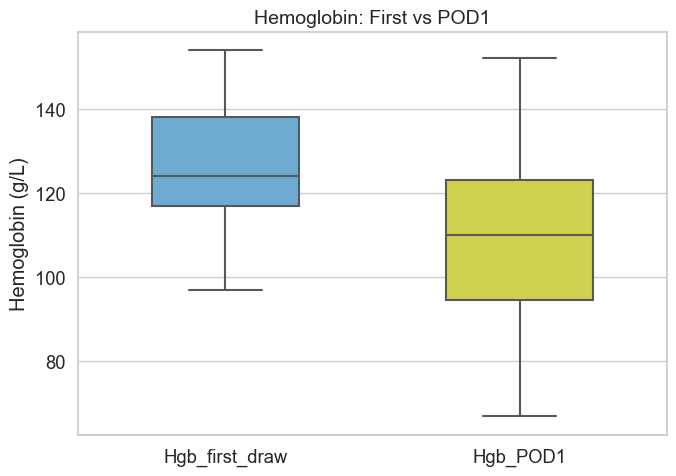

,Wilcoxon W,p-value,Median Difference (POD1 - First),95% CI Lower,95% CI Upper
0,23.0,4.619863e-07,-14.0,-23.0,-9.0


In [10]:
analyze_hgb(df_blood_draws_oac, pod_time="POD1")

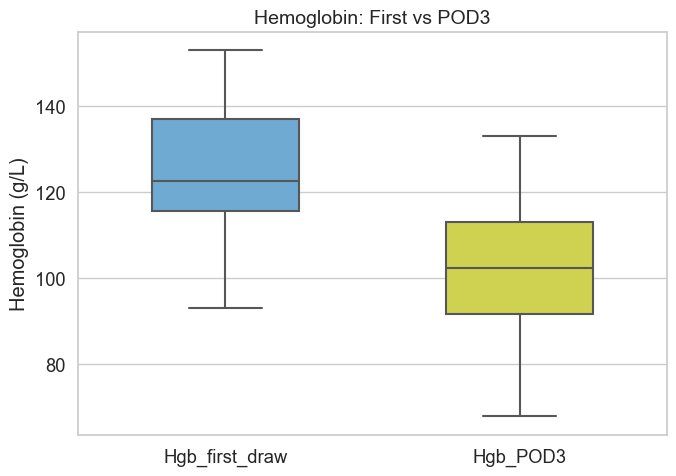

,Wilcoxon W,p-value,Median Difference (POD3 - First),95% CI Lower,95% CI Upper
0,8.0,1.818989e-10,-24.5,-29.0,-21.5


In [11]:
analyze_hgb(df_blood_draws_oac, pod_time="POD3")

In [12]:
# df_blood_draws[df_blood_draws['Time']=='Week2'].sort_values('StudyID')

In [13]:
df_blood_draws.head()

,StudyID,Time,Hemoglobin,Creatinine,R_time,K_time,Alpha_Angle,MA,LY30,ACT,Draw_date,injury_to_draw_hrs,surgery_to_draw_hrs,Pre_op_doac,Injury_date,Surgery_date,VTE_type,VTE
0,TH-001,Admission,165,142,0.4,1.2,76.2,62.7,0.0,87.9,2017-12-19 20:34:00,9.566667,-18.666667,No,2017-12-19 11:00,2017-12-20 15:14,No,No
1,TH-001,Week2,NaN,NaN,0.6,0.7,81.7,72.1,0.0,106.6,2018-01-02 11:17:00,336.283333,308.050000,No,2017-12-19 11:00,2017-12-20 15:14,No,No
2,TH-001,Week6,NaN,NaN,0.5,0.7,81.1,70.3,NaN,97.3,2018-01-30 14:10:00,1011.166667,982.933333,No,2017-12-19 11:00,2017-12-20 15:14,No,No
3,TH-001,Month3,NaN,NaN,0.7,0.7,79.5,69.6,0.0,116.0,2018-03-22 13:45:00,2234.750000,2206.516667,No,2017-12-19 11:00,2017-12-20 15:14,No,No
4,TH-001,PFD1,NaN,NaN,0.2,0.8,78.4,63.3,0.0,69.2,2017-12-20 11:15:00,24.250000,-3.983333,No,2017-12-19 11:00,2017-12-20 15:14,No,No


In [14]:
df_blood_draws[df_blood_draws['Time'].isin(['Admission','Pre-Op','PFD1','Pre-Op','PFD2','4 hr Pre-OP','Pre-draw','PFD3','PFD4'])].head(10)

,StudyID,Time,Hemoglobin,Creatinine,R_time,K_time,Alpha_Angle,MA,LY30,ACT,Draw_date,injury_to_draw_hrs,surgery_to_draw_hrs,Pre_op_doac,Injury_date,Surgery_date,VTE_type,VTE
0,TH-001,Admission,165,142,0.4,1.2,76.2,62.7,0.0,87.9,2017-12-19 20:34:00,9.566667,-18.666667,No,2017-12-19 11:00,2017-12-20 15:14,No,No
4,TH-001,PFD1,NaN,NaN,0.2,0.8,78.4,63.3,0.0,69.2,2017-12-20 11:15:00,24.250000,-3.983333,No,2017-12-19 11:00,2017-12-20 15:14,No,No
10,TH-002,Admission,158,56,0.4,1.1,75.1,64.3,0.0,87.9,2017-12-20 09:00:00,18.550000,-50.883333,No,2017-12-19 14:27,2017-12-22 11:53,No,No
14,TH-002,PFD1,NaN,NaN,0.3,1.4,73.5,61.5,0.0,78.5,2017-12-20 15:00:00,24.550000,-44.883333,No,2017-12-19 14:27,2017-12-22 11:53,No,No
15,TH-002,PFD2,NaN,NaN,0.5,1.2,74.6,65.0,0.0,97.3,2017-12-21 14:40:00,48.216667,-21.216667,No,2017-12-19 14:27,2017-12-22 11:53,No,No
21,TH-003,Admission,142,69,0.7,1.3,72.9,61.5,0.4,116.0,2018-01-29 20:55:00,6.166667,-18.766667,No,2018-01-29 14:45,2018-01-30 15:41,No,No
30,TH-004,Admission,NaN,NaN,0.8,1.0,75.7,66.7,0.0,125.3,2018-03-31 18:55:00,7.416667,NaN,No,2018-03-31 11:30,None,No,No
31,TH-004,PFD1,NaN,NaN,0.7,1.0,77.1,66.7,0.0,116.0,2018-04-01 13:30:00,26.000000,NaN,No,2018-03-31 11:30,None,No,No
32,TH-005,Admission,147,74,0.6,1.8,72.2,59.3,0.0,106.6,2018-04-04 21:30:00,7.750000,-61.133333,No,2018-04-04 13:45,2018-04-07 10:38,No,No
36,TH-005,PFD1,NaN,NaN,0.7,1.4,74.4,62.1,0.1,116.0,2018-04-05 14:45:00,25.000000,-43.883333,No,2018-04-04 13:45,2018-04-07 10:38,No,No


## Created two columns to pick depending on if we want pre-op closest to injury or if we want pre-op closest to surgery

In [15]:
preop_timepoints = ['Admission','Pre-Op','PFD1','Pre-Op','PFD2','4 hr Pre-OP','Pre-draw','PFD3','PFD4']

# Initialize new columns
df_blood_draws['closest_to_injury'] = 'No'
df_blood_draws['closest_to_surgery'] = 'No'


columns_to_check = ['R_time', 'K_time', 'MA', 'LY30', 'ACT','Alpha_Angle']

for patient_id, group in df_blood_draws.groupby('StudyID'):
    preop_draws = group[group['Time'].isin(preop_timepoints)].copy()
    
    if not preop_draws.empty:
        # Filter out draws where all columns are NaN
        valid_draws = preop_draws.dropna(subset=columns_to_check, how='all')
        
        if not valid_draws.empty:
            # Closest to injury
            closest_idx = valid_draws['time_from_injury_to_draw_hours'].idxmin()
            df_blood_draws.loc[closest_idx, 'closest_to_injury'] = 'Yes'
            
            # Closest to surgery
            farthest_idx = valid_draws['time_from_injury_to_draw_hours'].idxmax()
            df_blood_draws.loc[farthest_idx, 'closest_to_surgery'] = 'Yes'
        else:
            # If all draws are invalid, fallback to first/last pre-op draw
            df_blood_draws.loc[preop_draws.index[0], 'closest_to_injury'] = 'Yes'
            df_blood_draws.loc[preop_draws.index[-1], 'closest_to_surgery'] = 'Yes'
            
# # Loop over each patient
# for patient_id, group in df_blood_draws.groupby('StudyID'):
#     preop_draws = group[group['Time'].isin(preop_timepoints)].copy()
    
#     if not preop_draws.empty:
#         # Closest to injury
#         if preop_draws['time_from_injury_to_draw_hours'].notna().any():
#             closest_idx = preop_draws['time_from_injury_to_draw_hours'].idxmin()
#         elif (preop_draws['Time'] == 'Admission').any():
#             closest_idx = preop_draws[preop_draws['Time'] == 'Admission'].index[0]
#         else:
#             # Fallback: just take the first pre-op draw
#             closest_idx = preop_draws.index[0]
#         df_blood_draws.loc[closest_idx, 'closest_to_injury'] = 'Yes'
        
#         # Closest to surgery (farthest from injury)
#         if preop_draws['time_from_injury_to_draw_hours'].notna().any():
#             farthest_idx = preop_draws['time_from_injury_to_draw_hours'].idxmax()
#         elif (preop_draws['Time'] == 'Admission').any():
#             farthest_idx = preop_draws[preop_draws['Time'] == 'Admission'].index[0]
#         else:
#             # Fallback: just take the last pre-op draw
#             farthest_idx = preop_draws.index[-1]
#         df_blood_draws.loc[farthest_idx, 'closest_to_surgery'] = 'Yes'

# Update 'Time' for closest to injury
df_blood_draws['Time'] = np.where(
    df_blood_draws['closest_to_injury'] == 'Yes',
    'Pre_op',
    df_blood_draws['Time'])

KeyError: 'time_from_injury_to_draw_hours'

In [ ]:
# df_blood_draws[df_blood_draws['StudyID']=='TH-137']

In [ ]:
df_blood_draws[df_blood_draws['closest_to_injury']=='Yes'].head()

,StudyID,Time,Hemoglobin,Creatinine,R_time,K_time,Alpha_Angle,MA,LY30,ACT,Draw_date,time_from_injury_to_draw_hours,Pre_op_doac,VTE_type,VTE,closest_to_injury,closest_to_surgery
0.0,TH-001,Pre_op,165,142,0.4,1.2,76.2,62.7,0.0,87.9,2017-12-19 20:34,9.566667,No,No,No,Yes,No
10.0,TH-002,Pre_op,158,56,0.4,1.1,75.1,64.3,0.0,87.9,2017-12-20 09:00,18.550000,No,No,No,Yes,No
21.0,TH-003,Pre_op,142,69,0.7,1.3,72.9,61.5,0.4,116.0,2018-01-29 20:55,6.166667,No,No,No,Yes,Yes
30.0,TH-004,Pre_op,NaN,NaN,0.8,1.0,75.7,66.7,0.0,125.3,2018-03-31 18:55,7.416667,No,No,No,Yes,No
32.0,TH-005,Pre_op,147,74,0.6,1.8,72.2,59.3,0.0,106.6,2018-04-04 21:30,7.750000,No,No,No,Yes,No


In [ ]:
df_demo=df_demo[df_demo['StudyID']!='HPA-048']
columns = ['Sex', 'Age', 'BMI','VTE_type','VTE']
groupby = 'Pre_op_doac'
categorical = ['Sex','VTE_type','VTE']

nonnormal=['BMI'] 
display(my_tableone(df_demo, cols=columns, cats=categorical, non_norm=nonnormal, group=groupby))

Missing           Overall                No  \
level_0             level_1                                               
n                                                 338               293   
Sex, n (%)          Female        0        218 (64.5)        191 (65.2)   
                    Male                   120 (35.5)        102 (34.8)   
Age, mean (SD)                    1       78.1 (11.2)       77.2 (11.2)   
BMI, median [Q1,Q3]              26  23.9 [20.5,27.4]  24.2 [20.6,27.8]   
VTE_type, n (%)     Both        326          2 (16.7)          2 (20.0)   
                    DVT                      6 (50.0)          5 (50.0)   
                    PE                       4 (33.3)          3 (30.0)   
VTE, n (%)          No            0        326 (96.4)        283 (96.6)   
                    Yes                      12 (3.6)          10 (3.4)   

                                          Yes P-Value  \
level_0             level_1                             
n                                          45           
Sex, n (%)          Female          27 (60.0)   0.610   
                    Male            18 (40.0)           
Age, mean (SD)                     84.4 (8.8)  <0.001   
BMI, median [Q1,Q3]          22.5 [19.2,24.6]   0.027   
VTE_type, n (%)     Both                        0.741   
                    DVT              1 (50.0)           
                    PE               1 (50.0)           
VTE, n (%)          No              43 (95.6)   0.666   
                    Yes               2 (4.4)           

                                                                  Test  
level_0             level_1                                             
n                                                                       
Sex, n (%)          Female                                 Chi-squared  
                    Male                                                
Age, mean (SD)                                       Two Sample T-test  
BMI, median [Q1,Q3]                                       Mann-Whitney  
VTE_type, n (%)     Both     Chi-squared (warning: expected count < 5)  
                    DVT                                                 
                    PE                                                  
VTE, n (%)          No                                  Fisher's exact  
                    Yes

In [ ]:
columns = ['R_time', 'K_time',  'MA', 'LY30', 'ACT','Alpha_Angle'] 
groupby = 'Pre_op_doac'
categorical = []


for timepoint in ['Pre_op','POD1', 'POD3', 'POD5', 'POD7', 'Week2', 'Week4', 'Week6', 'Month3']:
    print(timepoint)
    print('++++++++++++++++++++++++++++++++++++++++++++')
    df=df_blood_draws[df_blood_draws['Time']==timepoint]


    

    nonnormal=[ 'R_time', 'K_time',  'MA', 'LY30', 'ACT','Alpha_Angle'] 
    display(my_tableone(df, cols=columns, cats=categorical, non_norm=nonnormal, group=groupby))

Pre_op
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,311,265,45,,
"R_time, median [Q1,Q3]",,7,"0.5 [0.4,0.6]","0.5 [0.4,0.6]","0.5 [0.4,0.7]",0.452,Mann-Whitney
"K_time, median [Q1,Q3]",,8,"1.3 [1.0,1.6]","1.3 [1.0,1.7]","1.2 [0.9,1.4]",0.1,Mann-Whitney
"MA, median [Q1,Q3]",,7,"62.8 [59.3,65.0]","62.8 [59.3,65.1]","62.6 [60.3,64.5]",0.768,Mann-Whitney
"LY30, median [Q1,Q3]",,14,"0.0 [0.0,0.5]","0.0 [0.0,0.5]","0.0 [0.0,0.2]",0.196,Mann-Whitney
"ACT, median [Q1,Q3]",,8,"97.3 [87.9,106.6]","97.3 [87.9,106.6]","97.3 [87.9,116.0]",0.409,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,7,"75.3 [72.9,77.0]","75.2 [72.7,76.9]","75.6 [73.9,77.4]",0.116,Mann-Whitney


POD1
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,311,266,45,,
"R_time, median [Q1,Q3]",,7,"0.5 [0.4,0.6]","0.5 [0.4,0.6]","0.4 [0.3,0.6]",0.563,Mann-Whitney
"K_time, median [Q1,Q3]",,8,"1.1 [0.9,1.3]","1.2 [0.9,1.4]","1.0 [0.8,1.2]",0.007,Mann-Whitney
"MA, median [Q1,Q3]",,7,"64.0 [60.8,66.5]","63.8 [60.5,66.4]","64.8 [62.5,67.0]",0.096,Mann-Whitney
"LY30, median [Q1,Q3]",,17,"0.1 [0.0,0.7]","0.2 [0.0,0.8]","0.0 [0.0,0.1]",0.0,Mann-Whitney
"ACT, median [Q1,Q3]",,7,"97.3 [87.9,106.6]","97.3 [87.9,106.6]","87.9 [80.8,104.3]",0.627,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,7,"76.6 [75.0,78.0]","76.4 [74.7,77.8]","77.6 [76.1,78.9]",0.002,Mann-Whitney


POD3
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,270,227,43,,
"R_time, median [Q1,Q3]",,6,"0.4 [0.3,0.5]","0.4 [0.3,0.5]","0.5 [0.3,0.6]",0.07,Mann-Whitney
"K_time, median [Q1,Q3]",,6,"0.8 [0.7,0.9]","0.8 [0.7,0.9]","0.8 [0.8,0.9]",0.208,Mann-Whitney
"MA, median [Q1,Q3]",,6,"68.0 [65.5,69.7]","68.0 [65.5,69.9]","67.5 [65.4,68.9]",0.256,Mann-Whitney
"LY30, median [Q1,Q3]",,10,"0.1 [0.0,0.5]","0.1 [0.0,0.6]","0.0 [0.0,0.2]",0.03,Mann-Whitney
"ACT, median [Q1,Q3]",,6,"87.9 [78.5,97.3]","87.9 [78.5,97.3]","97.3 [78.5,106.6]",0.065,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,6,"79.1 [77.8,80.3]","79.2 [77.8,80.3]","78.9 [77.5,79.9]",0.152,Mann-Whitney


POD5
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,246,203,43,,
"R_time, median [Q1,Q3]",,6,"0.4 [0.3,0.5]","0.4 [0.3,0.5]","0.5 [0.4,0.7]",0.001,Mann-Whitney
"K_time, median [Q1,Q3]",,6,"0.8 [0.7,0.8]","0.8 [0.7,0.8]","0.8 [0.7,0.8]",0.072,Mann-Whitney
"MA, median [Q1,Q3]",,6,"69.8 [67.8,71.1]","69.8 [67.9,71.2]","69.8 [67.6,70.3]",0.102,Mann-Whitney
"LY30, median [Q1,Q3]",,8,"0.0 [0.0,0.1]","0.0 [0.0,0.1]","0.0 [0.0,0.0]",0.081,Mann-Whitney
"ACT, median [Q1,Q3]",,6,"87.9 [78.5,97.3]","87.9 [78.5,97.3]","97.3 [87.9,116.0]",0.001,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,6,"79.9 [78.5,81.0]","80.0 [78.7,81.2]","79.6 [78.1,80.5]",0.062,Mann-Whitney


POD7
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,106,72,34,,
"R_time, median [Q1,Q3]",,2,"0.4 [0.3,0.5]","0.4 [0.3,0.5]","0.5 [0.4,0.6]",0.046,Mann-Whitney
"K_time, median [Q1,Q3]",,2,"0.7 [0.7,0.8]","0.7 [0.7,0.8]","0.8 [0.7,0.8]",0.584,Mann-Whitney
"MA, median [Q1,Q3]",,2,"70.5 [68.5,71.8]","70.5 [68.7,72.5]","70.4 [68.0,71.5]",0.388,Mann-Whitney
"LY30, median [Q1,Q3]",,2,"0.0 [0.0,0.0]","0.0 [0.0,0.0]","0.0 [0.0,0.0]",0.319,Mann-Whitney
"ACT, median [Q1,Q3]",,2,"87.9 [78.5,97.3]","87.9 [78.5,97.3]","92.6 [85.6,106.6]",0.052,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,2,"80.5 [79.1,81.3]","80.5 [79.2,81.3]","80.2 [79.1,81.2]",0.35,Mann-Whitney


Week2
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,241,206,35,,
"R_time, median [Q1,Q3]",,4,"0.4 [0.3,0.5]","0.4 [0.3,0.5]","0.5 [0.3,0.7]",0.08,Mann-Whitney
"K_time, median [Q1,Q3]",,4,"0.8 [0.7,0.8]","0.8 [0.7,0.8]","0.7 [0.7,0.8]",0.48,Mann-Whitney
"MA, median [Q1,Q3]",,4,"70.7 [68.6,72.4]","70.7 [68.6,72.5]","71.1 [69.1,72.2]",0.948,Mann-Whitney
"LY30, median [Q1,Q3]",,6,"0.0 [0.0,0.1]","0.0 [0.0,0.1]","0.0 [0.0,0.0]",0.308,Mann-Whitney
"ACT, median [Q1,Q3]",,4,"87.9 [78.5,97.3]","87.9 [78.5,97.3]","97.3 [83.2,116.0]",0.08,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,4,"80.4 [79.0,81.6]","80.3 [79.0,81.5]","80.8 [79.2,81.7]",0.523,Mann-Whitney


Week4
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,173,140,33,,
"R_time, median [Q1,Q3]",,11,"0.4 [0.3,0.5]","0.4 [0.3,0.5]","0.5 [0.4,0.7]",0.097,Mann-Whitney
"K_time, median [Q1,Q3]",,11,"0.8 [0.8,1.0]","0.8 [0.8,1.1]","0.8 [0.8,0.9]",0.098,Mann-Whitney
"MA, median [Q1,Q3]",,11,"67.2 [65.1,69.4]","67.0 [64.8,69.1]","68.3 [66.3,70.0]",0.096,Mann-Whitney
"LY30, median [Q1,Q3]",,15,"0.0 [0.0,0.3]","0.0 [0.0,0.4]","0.0 [0.0,0.1]",0.348,Mann-Whitney
"ACT, median [Q1,Q3]",,11,"87.9 [78.5,97.3]","87.9 [78.5,97.3]","97.3 [87.9,116.0]",0.079,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,11,"78.0 [76.5,79.7]","77.9 [76.4,79.6]","78.9 [77.3,80.1]",0.075,Mann-Whitney


Week6
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,235,201,34,,
"R_time, median [Q1,Q3]",,10,"0.5 [0.4,0.6]","0.4 [0.4,0.6]","0.5 [0.4,0.7]",0.026,Mann-Whitney
"K_time, median [Q1,Q3]",,10,"1.0 [0.8,1.2]","1.0 [0.8,1.2]","1.0 [0.8,1.1]",0.647,Mann-Whitney
"MA, median [Q1,Q3]",,10,"66.0 [63.7,68.1]","66.0 [63.6,68.1]","65.9 [64.0,67.3]",0.858,Mann-Whitney
"LY30, median [Q1,Q3]",,14,"0.1 [0.0,0.5]","0.1 [0.0,0.5]","0.0 [0.0,0.4]",0.433,Mann-Whitney
"ACT, median [Q1,Q3]",,10,"97.3 [87.9,106.6]","87.9 [87.9,106.6]","97.3 [87.9,116.0]",0.026,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,10,"77.0 [75.8,78.5]","77.0 [75.9,78.5]","76.7 [75.8,78.0]",0.82,Mann-Whitney


Month3
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,233,203,30,,
"R_time, median [Q1,Q3]",,10,"0.5 [0.4,0.6]","0.5 [0.3,0.6]","0.5 [0.5,0.7]",0.008,Mann-Whitney
"K_time, median [Q1,Q3]",,10,"1.1 [0.9,1.3]","1.2 [0.9,1.3]","1.1 [0.9,1.2]",0.169,Mann-Whitney
"MA, median [Q1,Q3]",,10,"64.8 [61.6,66.5]","64.7 [61.4,66.5]","65.1 [62.0,66.7]",0.554,Mann-Whitney
"LY30, median [Q1,Q3]",,17,"0.1 [0.0,0.6]","0.1 [0.0,0.7]","0.0 [0.0,0.4]",0.133,Mann-Whitney
"ACT, median [Q1,Q3]",,10,"97.3 [87.9,106.6]","97.3 [78.5,106.6]","97.3 [97.3,116.0]",0.008,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,10,"76.1 [74.4,77.6]","76.0 [74.2,77.6]","76.4 [75.5,78.0]",0.283,Mann-Whitney


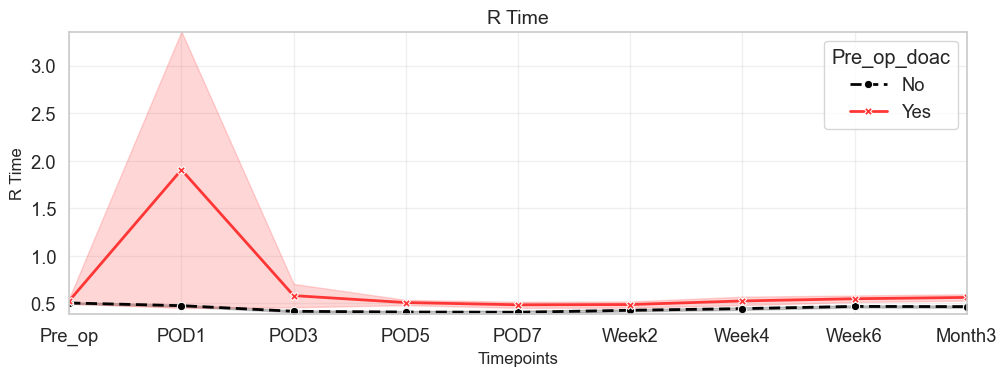

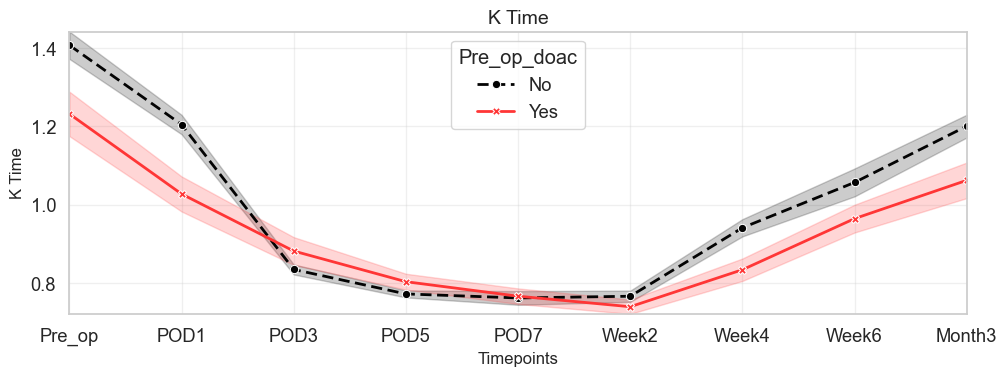

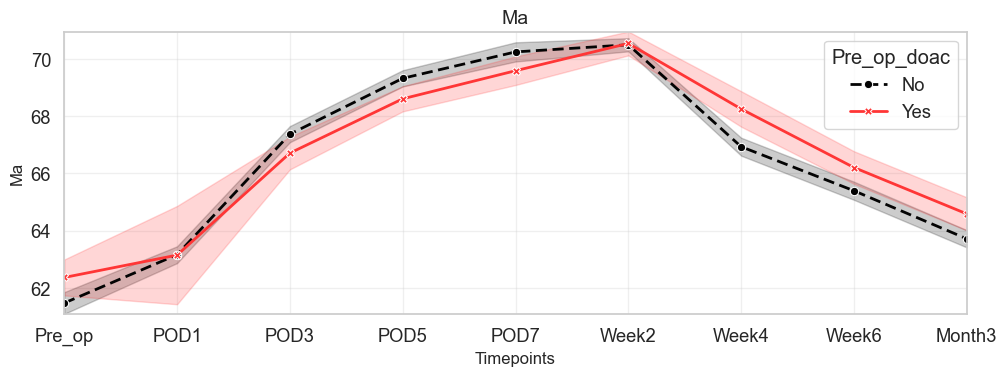

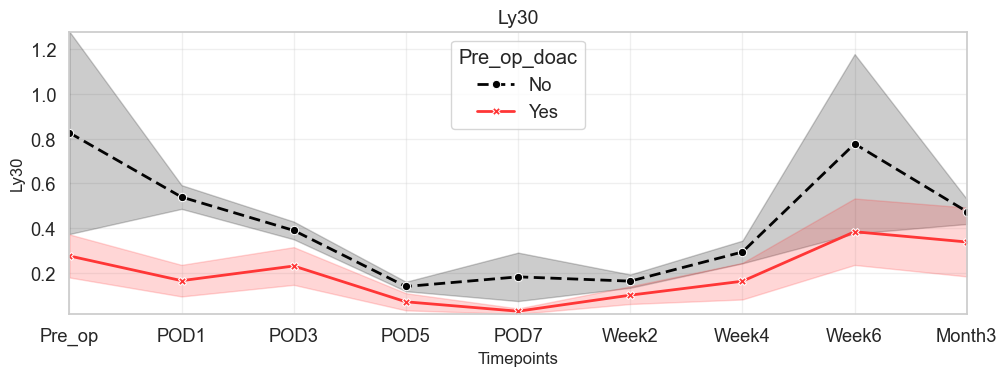

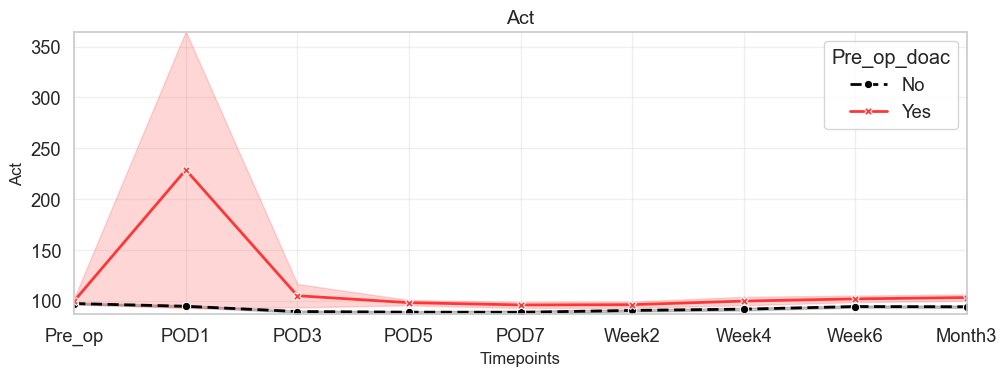

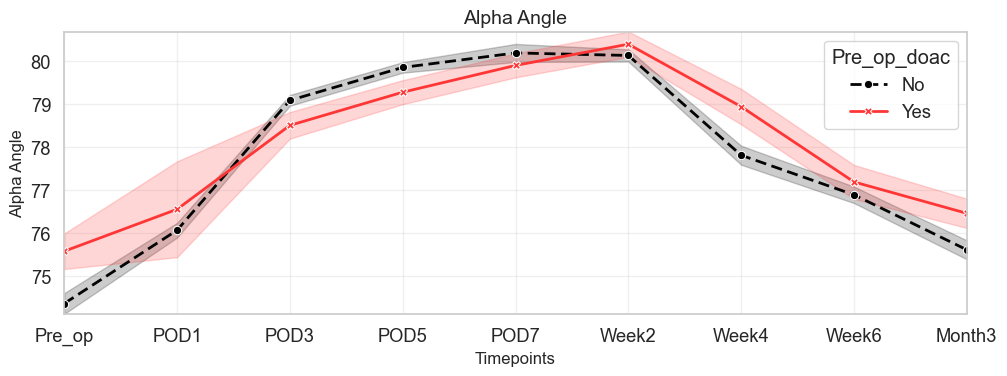

In [ ]:
for col in columns:
    df_blood_draws[col] = pd.to_numeric(df_blood_draws[col], errors='coerce')

    
plot_variables_over_time(df_blood_draws,
                         hue='Pre_op_doac', 
    style='Pre_op_doac',
    palette={'Yes':"#ff3636", 'No':"#030303"},
    
    # var_labels=var_labels,
    xlabel="Timepoints",
)

In [ ]:
df_blood_draws[(df_blood_draws['StudyID']=='TH-190')&(df_blood_draws['Time']=='Pre_op')][['Time','LY30','Pre_op_doac']]

,Time,LY30,Pre_op_doac


In [ ]:
display(processor_1.get_patient_blood_draws('TH-188')[['Time','LY30']])

,Time,LY30
0,Admission,NaN
1,Week4,0.0
2,Week6,0.0
3,Month3,0.0
4,Pre-Op,0.0
5,POD3,0.0
6,POD5,0.0
7,POD7,0.0


In [ ]:
# 0

In [ ]:
# hip_blood[hip_blood['Time'].isin(['Admission','PFD1','PFD2','PFD3','PFD4'])]

In [ ]:



# project = Project(api_url, api_key)

# # Export all records directly (no report needed)
# records_data = project.export_records()  # returns list of dicts

# # Convert to DataFrame
# df = pd.DataFrame(records_data)

# # Convert to DataFrame
# df = pd.DataFrame(records_data)


# # Create Record objects from DataFrame
# record_objects = {}

# for _, row in df.iterrows():  # iterate over DataFrame rows
#     record_id = row['patient_id']  # use correct column name
#     if record_id not in record_objects:
#         record_objects[record_id] = Record(record_id)
    
#     draw_id = row['lab_dt_blood_draw']
#     if pd.notna(draw_id):  # only create BloodDraw if there is a timestamp
#         # Dynamically get lab columns
#         lab_columns = ['lab_rteg_timepoint','lp_hemoglobin', 'lp_creatinine', 'rteg_crt_rvalue', 
#                        'rteg_crt_ktime', 'rteg_crt_aangle', 'rteg_crt_ma',
#                        'rteg_crt_ly30', 'rteg_crt_tegact']
#         lab_data = {col: row[col] for col in lab_columns if pd.notna(row[col])}

#         blood_draw = BloodDraw(draw_id=draw_id, **lab_data)
#         record_objects[record_id].add_blood_draw(blood_draw)

# # ### Hip Pathway
# # load_dotenv()

# # # Retrieve environment variables
# # api_key = os.getenv("REDCAP_HIP_PATHWAY_API_KEY")
# # api_url = os.getenv("REDCAP_URL")

# # project = Project(api_url, api_key)

# # df2 = project.export_report(report_id="16762",format_type="df", raw_or_label='label',df_kwargs={"index_col": None}).reset_index(drop=True)  

In [ ]:
# df1_std = loader.prepare_dataframe(df1, add_med=True, add_vte=True)
# df2_std = loader.prepare_dataframe(df2, add_med=True, add_vte=True)

# # Merge
# merged_df = pd.concat([df1_std, df2_std], ignore_index=True)

In [ ]:
print('Total Number:', df.StudyID.nunique())

Total Number: 233


In [ ]:
merged_df['StudyID'].nunique()

NameError: name 'merged_df' is not defined

## Finding StudyIDs that do not have value at "Admission"

In [ ]:
# Find all StudyIDs with Admission
with_admission = merged_df.loc[merged_df['Time'] == 'Admission', 'StudyID'].unique()

# Find all StudyIDs
all_ids = merged_df['StudyID'].unique()

# Get the ones without Admission
without_admission = list(set(all_ids) - set(with_admission))

print(without_admission)


'''These patients withdrew and not much data available and should be excluded.''' 

In [ ]:
# merged_df= merged_df[merged_df['Time']!='nan'].copy()
merged_df = merged_df[merged_df['Time'].notna()].copy()

In [ ]:
merged_df['VTE'].value_counts(dropna=False)

## Asked Casandra to fix these duplicates

In [ ]:
df_ = merged_df[merged_df['Time']=='Admission']
df_[df_['StudyID'].duplicated(keep=False)][['StudyID','Hemoglobin','R_time',	'K_time',	'Alpha_Angle',	'MA',	'LY30',	'ACT','Draw_date','Time']]

In [ ]:
df_ = merged_df[merged_df['Time']=='POD5']
df_[df_['StudyID'].duplicated(keep=False)][['StudyID','Hemoglobin','R_time',	'K_time',	'Alpha_Angle',	'MA',	'LY30',	'ACT','Draw_date','Time']]

In [ ]:
df_ = merged_df[merged_df['Time']=='Week2']
df_[df_['StudyID'].duplicated(keep=False)][['StudyID','Hemoglobin','R_time',	'K_time',	'Alpha_Angle',	'MA',	'LY30',	'ACT','Draw_date','Time']]

In [ ]:
relevant_timepoints = ['Admission','Pre-Op','Pre-draw','PFD1','PFD2','PFD3','PFD4','4 hr Pre-OP']

hgb_drop_df = loader.compute_hb_drop(merged_df, relevant_timepoints=relevant_timepoints, timepoint_end='POD1')
display(hgb_drop_df.head())
print(len(hgb_drop_df))

print('These werent included in original file I gave to Prism:')
'''["TH-025","TH-033","TH-095","TH-156","TH-157","TH-175","TH-183","TH-196","TH-197","TH-199","TH-218","TH-230","TH-238","TH-263"]'''

In [ ]:
# Just looking at some of the values
merged_df[merged_df['StudyID']=='TH-095'][['StudyID','Time','hours_from_injury_to_bloodDraw','Hemoglobin','blood_draw_label','VTE']]

In [ ]:
columns = ['Age', 'Sex', 'BMI','VTE']
categorical = ['Sex','VTE']
nonnormal=['BMI']

subset_df = merged_df[(merged_df['Time'] == 'Admission')]
subset_df=subset_df.drop_duplicates(subset=['StudyID','Time'], keep='first')
  
subset_df
table1 = TableOne(
    subset_df,
    columns=columns,
    groupby='DOAC_status',
    categorical=categorical,
    nonnormal=nonnormal,
    normal_test=True
)


table1

In [ ]:
display(tb.table1(hgb_drop_df, columns=['Hb_Drop'],group='DOAC_status', nonnormal=[],categorical=[]))

plt.figure(figsize=(8,6))
sns.boxplot(x='DOAC_status', y='Hb_Drop', data=hgb_drop_df, palette='Set2')

# Overlay individual points
sns.stripplot(x='DOAC_status', y='Hb_Drop', data=hgb_drop_df, color='black', alpha=0.6, jitter=False)

# Labels
plt.title('Hemoglobin Drop: OAC vs Non-OAC')
plt.ylabel('Hemoglobin Drop (g/L)')
plt.xlabel('DOAC_status Group')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Only OACs

In [ ]:
hgb_drop_OAC = hgb_drop_df[hgb_drop_df['DOAC_status']=='OAC'].dropna(subset=['Hb_Drop'])

In [ ]:
hgb_drop_OAC['delta_Hgb'] = hgb_drop_OAC['POD1_Hgb'] - hgb_drop_OAC['first_draw_Hgb']
stat, p_val = wilcoxon(hgb_drop_OAC['first_draw_Hgb'], hgb_drop_OAC['POD1_Hgb'])
median_diff = hgb_drop_OAC['delta_Hgb'].median()


np.random.seed(200)
boot_medians = [
    np.median(np.random.choice(hgb_drop_OAC['delta_Hgb'], size=len(hgb_drop_OAC), replace=True))
    for _ in range(5000)
]
ci_lower, ci_upper = np.percentile(boot_medians, [2.5, 97.5])

# Put results in a DataFrame
results_df = pd.DataFrame({
    'Wilcoxon W': [stat],
    'p-value': [p_val],
    'Median Difference (POD1 - First)': [median_diff],
    '95% CI Lower': [ci_lower],
    '95% CI Upper': [ci_upper]
})

display(results_df)



df_long = hgb_drop_OAC.melt(value_vars=['first_draw_Hgb', 'POD1_Hgb'],
                       var_name='Timepoint', value_name='Hemoglobin')

# Set Seaborn style
sns.set_theme(style="whitegrid", font_scale=1.2)
custom_palette = ['#5DADE2', "#E4E73C"]  # Blue and red


plt.figure(figsize=(7, 5))
ax = sns.boxplot(
    data=df_long,
    x='Timepoint',
    y='Hemoglobin',
    palette=custom_palette,
    width=0.5,
    linewidth=1.5,
    fliersize=0
)
# Titles and labels
plt.title('Hemoglobin: First vs POD1', fontsize=14)
plt.ylabel('Hemoglobin (g/L)')
plt.xlabel('')
plt.tight_layout()

In [ ]:

merged_df['VTE']=np.where(merged_df['VTE'].isin(['PE','DVT','Both']), 'VTE','No VTE')
custom_order = ['Admission', 'POD1', 'POD3', 'POD5', 'Week2', 'Week4', 'Week6', 'Month3']
custom_palette = {'VTE': "#EE6F20", 'No VTE': 'black'}
variables = ['MA','R_time']

loader.plot_variables_over_time(df=merged_df, variables=variables,
                                custom_order=custom_order, 
                                hue='VTE', style='VTE',
                                custom_palette=custom_palette,
                                save_folder="plots")


In [ ]:
conditions = [
    (merged_df['Time'].isin(['Admission','PFD 1','PFD 2','Pre-draw','4 hr Pre-OP '])) & (merged_df['hours_from_injury_to_bloodDraw'] >= 0) & (merged_df['hours_from_injury_to_bloodDraw'] <= 24),
    (merged_df['Time'].isin(['Admission','PFD 1','PFD 2','Pre-draw','4 hr Pre-OP '])) & (merged_df['hours_from_injury_to_bloodDraw'] > 24) & (merged_df['hours_from_injury_to_bloodDraw'] <= 48),
    (merged_df['Time'].isin(['Admission','PFD 1','PFD 2','Pre-draw','4 hr Pre-OP '])) & (merged_df['hours_from_injury_to_bloodDraw'] > 48) & (merged_df['hours_from_injury_to_bloodDraw'] <= 72),



    (merged_df['Time'].isin(['POD 1','POD 3','POD 5','POD 7','2 week','4 week','6 week']) & (merged_df['hours_from_injury_to_bloodDraw'] >= 0) & (merged_df['hours_from_injury_to_bloodDraw'] <= 30)),
    (merged_df['Time'].isin(['POD 1','POD 3','POD 5','POD 7','2 week','4 week','6 week']) & (merged_df['hours_from_injury_to_bloodDraw'] > 48) & (merged_df['hours_from_injury_to_bloodDraw'] <= 78))
]

# Define corresponding labels
labels = [
    '0-24h post_injury',
    '25-48h post_injury',
    '49-72h post_injury',
    'POD1',
    'POD3'
]

# Apply classification
merged_df['time_classifications'] = np.select(conditions, labels, default='')